# Run Sirepo/SRW simulations with Bluesky

This section is based on the **Young's Double Slit Experiment** Sirepo example
that can be found in the wavefront propagation folder on the SRW simulations
section.

**Hint**: See the [List of predefined simulations in Sirepo](../simulations.rst) for examples of identifiers for different beamlines.

## Run "Source" SRW simulations

In this example, we run a simulation using the "Single-Electron Spectrum" report on the "Source" page of Sirepo/SRW app.

In [1]:
%run -i ../../../examples/prepare_det_env.py

import sirepo_bluesky.srw_detector as sd
import bluesky.plans as bp

srw_det = sd.SirepoSRWDetector(sim_id="00000000", sim_type="srw",
                               source_simulation=True,
                               sirepo_server="http://localhost:8000",
                               root_dir="/tmp/sirepo-bluesky-data")

srw_det.configuration_attrs = ["photon_energy", "shape"]
srw_det.duration.kind = 'hinted'

uid, = RE(bp.count([srw_det]))



Transient Scan ID: 1     Time: 2022-11-04 22:45:11
Persistent Unique Scan ID: '1ba43282-fbb9-4083-b895-693de447302a'


New stream: 'primary'
+-----------+------------+--------------+------------------+
|   seq_num |       time | srw_det_mean | srw_det_duration |
+-----------+------------+--------------+------------------+
|         1 | 22:45:16.4 | 9721365919945.510 |            5.150 |
+-----------+------------+--------------+------------------+
generator count ['1ba43282'] (scan num: 1)





We can observe the produced spectrum as:

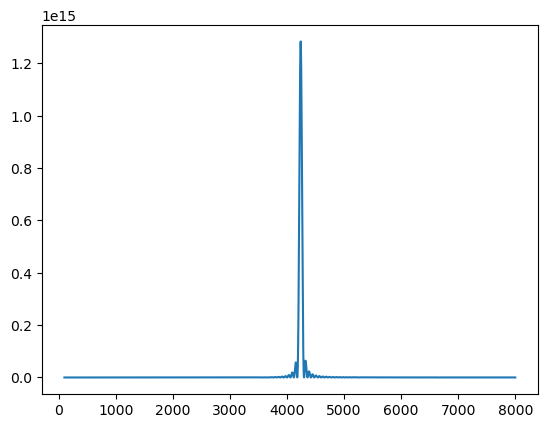

In [2]:
hdr = db[uid]
cfg = hdr.config_data(srw_det.name)["primary"][0]
energies = cfg[f"{srw_det.name}_photon_energy"]
spectrum, = hdr.data(f"{srw_det.name}_image")
plt.plot(energies, spectrum)

## Run "Beamline" SRW simulations sequentially

In this example, we scan the horizontal size of the aperture and collect the resulting averaged intensities and corresponding 2D intensity distributions from the "Watchpoint" report on the "Beamline" page of Sirepo/SRW app.

Start ``ipython`` and run the code in the following cell. Note that ``sim_id`` may be replaced by the identifier for any supported Sirepo simulation.



Transient Scan ID: 1     Time: 2022-11-04 22:45:16
Persistent Unique Scan ID: '424a12b0-274b-48ce-bfef-02f2f5b9aa3b'


New stream: 'primary'
+-----------+------------+--------------------------------+--------------+------------------+
|   seq_num |       time | Aperture_sirepo_horizontalSize | srw_det_mean | srw_det_duration |
+-----------+------------+--------------------------------+--------------+------------------+
|         1 | 22:45:22.1 |                          0.000 |        0.000 |            5.154 |


|         2 | 22:45:27.4 |                          0.025 | 1555207921769.845 |            5.211 |


|         3 | 22:45:32.8 |                          0.050 | 4662310199493.528 |            5.206 |


|         4 | 22:45:38.2 |                          0.075 | 6655467645389.955 |            5.219 |


|         5 | 22:45:43.5 |                          0.100 | 8312082100422.471 |            5.203 |


|         6 | 22:45:48.9 |                          0.125 | 10838241530711.086 |            5.212 |


|         7 | 22:45:54.3 |                          0.150 | 12368326246643.777 |            5.211 |


|         8 | 22:45:59.7 |                          0.175 | 17773014235199.816 |            5.209 |


|         9 | 22:46:05.0 |                          0.200 | 19506043410022.797 |            5.203 |


|        10 | 22:46:10.4 |                          0.225 | 22993350158054.234 |            5.229 |


|        11 | 22:46:15.8 |                          0.250 | 26660776646668.676 |            5.191 |
+-----------+------------+--------------------------------+--------------+------------------+
generator scan ['424a12b0'] (scan num: 1)


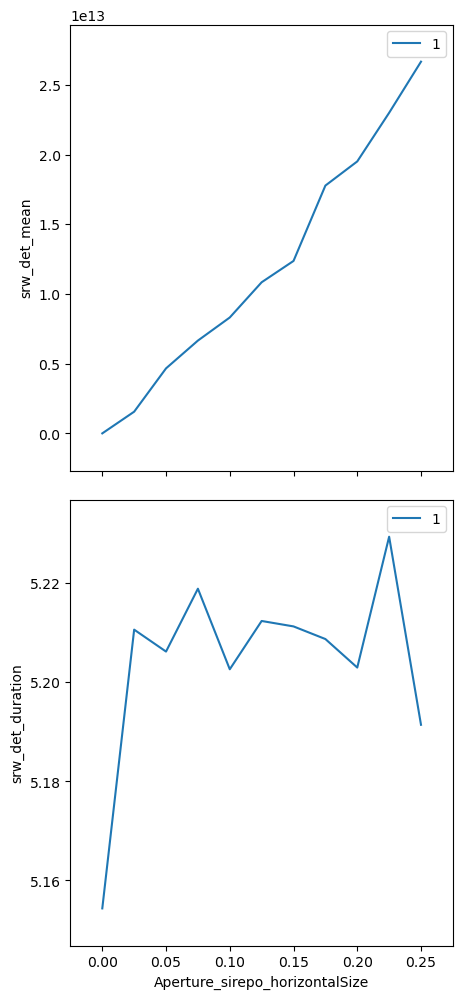

In [3]:
%run -i ../../../examples/prepare_det_env.py

import sirepo_bluesky.srw_detector as sd
import bluesky.plans as bp

srw_det = sd.SirepoSRWDetector(sim_id="00000000", sim_type="srw",
                               sirepo_server="http://localhost:8000",
                               root_dir="/tmp/sirepo-bluesky-data")

srw_det.select_optic("Aperture")
param1 = srw_det.create_parameter("horizontalSize")
param2 = srw_det.create_parameter("verticalSize")
srw_det.configuration_attrs = ["horizontal_extent", "vertical_extent", "shape"]
srw_det.duration.kind = 'hinted'

uid, = RE(bp.scan([srw_det], param1, 0.0, 0.25, 11))

We can access the data as the last item in the database (`db[-1]`) or directly via the returned `uid`, which when plotted as an image will look like:

In [4]:
hdr = db[uid]
hdr.table()

,time,srw_det_image,srw_det_shape,srw_det_mean,srw_det_duration,srw_det_photon_energy,srw_det_horizontal_extent,srw_det_vertical_extent,srw_det_sirepo_json,Aperture_sirepo_horizontalSize,Aperture_sirepo_horizontalSize_setpoint
seq_num,,,,,,,,,,,
1,2022-11-04 22:45:22.100625992,ea535273-a62f-40d5-a2b2-3bbccc527def/0,"[168, 88]",0.000000e+00,5.154355,4240.0,"[-0.0004, 0.0004]","[-0.0005, 0.0005000000000000002]","{""models"": {""arbitraryMagField"": {""interpolati...",0.000,0.000
2,2022-11-04 22:45:27.473278046,c49b8fc4-86ce-42cd-84dc-464b85d42199/0,"[294, 120]",1.555208e+12,5.210628,4240.0,"[-0.0005471264367816092, 0.0005471264367816092]","[-0.000877245508982036, 0.0008772455089820358]","{""models"": {""arbitraryMagField"": {""interpolati...",0.025,0.025
3,2022-11-04 22:45:32.847718716,a3f4f828-4b0a-4623-ab29-23e35a35a271/0,"[294, 120]",4.662310e+12,5.206201,4240.0,"[-0.0005471264367816092, 0.0005471264367816092]","[-0.000877245508982036, 0.0008772455089820358]","{""models"": {""arbitraryMagField"": {""interpolati...",0.050,0.050
4,2022-11-04 22:45:38.223528147,213486f0-97e9-4607-a2a5-5edc14c31731/0,"[294, 112]",6.655468e+12,5.218893,4240.0,"[-0.000510344827586207, 0.000510344827586207]","[-0.000877245508982036, 0.0008772455089820358]","{""models"": {""arbitraryMagField"": {""interpolati...",0.075,0.075
5,2022-11-04 22:45:43.598644495,9323d2c1-79b2-423a-b97c-777e914c3a31/0,"[294, 112]",8.312082e+12,5.202626,4240.0,"[-0.000510344827586207, 0.000510344827586207]","[-0.000877245508982036, 0.0008772455089820358]","{""models"": {""arbitraryMagField"": {""interpolati...",0.100,0.100
6,2022-11-04 22:45:48.971506834,72ca542a-c9ab-4ace-9360-dfffab0552ee/0,"[294, 120]",1.083824e+13,5.212378,4240.0,"[-0.0005471264367816092, 0.0005471264367816092]","[-0.000877245508982036, 0.0008772455089820358]","{""models"": {""arbitraryMagField"": {""interpolati...",0.125,0.125
7,2022-11-04 22:45:54.351418734,3561eedb-4d14-4563-89fd-2907ef255db1/0,"[294, 120]",1.236833e+13,5.211281,4240.0,"[-0.0005471264367816092, 0.0005471264367816092]","[-0.000877245508982036, 0.0008772455089820358]","{""models"": {""arbitraryMagField"": {""interpolati...",0.150,0.150
8,2022-11-04 22:45:59.720457315,214329bd-b1aa-4a59-9e30-3cb0cd1b2240/0,"[294, 104]",1.777301e+13,5.208732,4240.0,"[-0.0004735632183908046, 0.0004735632183908046]","[-0.000877245508982036, 0.0008772455089820358]","{""models"": {""arbitraryMagField"": {""interpolati...",0.175,0.175
9,2022-11-04 22:46:05.098714352,9b711006-3757-4c18-b192-de1a16e5a0ec/0,"[294, 104]",1.950604e+13,5.202974,4240.0,"[-0.0004735632183908046, 0.0004735632183908046]","[-0.000877245508982036, 0.0008772455089820358]","{""models"": {""arbitraryMagField"": {""interpolati...",0.200,0.200


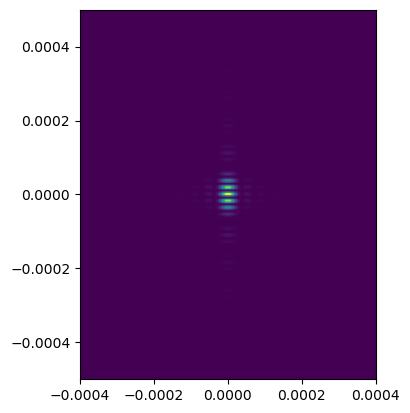

In [5]:
imgs = list(hdr.data(f"{srw_det.name}_image"))
cfg = hdr.config_data(srw_det.name)["primary"][0]
hor_ext = cfg[f"{srw_det.name}_horizontal_extent"]
vert_ext = cfg[f"{srw_det.name}_vertical_extent"]
plt.imshow(imgs[-2], aspect="equal", extent=(*hor_ext, *vert_ext))

## Run "Beamline" SRW simulations in parallel

In this example, we are using [Bluesky's fly scans](https://blueskyproject.io/bluesky/async.html#flying).

In [6]:
%run -i ../../../examples/prepare_flyer_env.py

import bluesky.plans as bp
import sirepo_bluesky.sirepo_flyer as sf

We can create 3 different simulations that change 4 parameters at a time:

In [7]:
params_to_change = []
key1 = "Aperture"
key2 = "Lens"
key3 = "Obstacle"
for i in range(1, 3 + 1):
    parameters_update1 = {"horizontalSize": i * 0.1, "verticalSize": (16 - i) * 0.1}
    parameters_update2 = {"horizontalFocalLength": i + 7}
    parameters_update3 = {"horizontalSize": 6 - i}
    params_to_change.append({key1: parameters_update1,
                             key2: parameters_update2,
                             key3: parameters_update3})

To create the flyer and run a fly scan, where ``sim_id`` is the UID of this simulation, we run:

In [8]:
sirepo_flyer = sf.SirepoFlyer(sim_id="00000000",
                              server_name="http://localhost:8000",
                              root_dir="/tmp/sirepo-bluesky-data",
                              params_to_change=params_to_change,
                              watch_name="W60")

uid, = RE(bp.fly([sirepo_flyer]))



Transient Scan ID: 1     Time: 2022-11-04 22:46:16
Persistent Unique Scan ID: 'bc0b64e2-5188-4e9b-8c99-9e234c7fb8e3'


copy 00000000 -> zTAKb0tn, Youngs Double Slit Experiment Bluesky
copy 00000000 -> DcX5suur, Youngs Double Slit Experiment Bluesky 2
copy 00000000 -> zbpYx9FT, Youngs Double Slit Experiment Bluesky 3


running sim zTAKb0tn

running sim zbpYx9FT

running sim DcX5suur

Status of sim zTAKb0tn: completed in 11.8 seconds

Status of sim DcX5suur: completed in 17.2 seconds

Status of sim zbpYx9FT: completed in 17.7 seconds

New stream: 'sirepo_flyer'


copy zTAKb0tn data hash: d5d6628d50bd65a329717e8ffb942224
copy DcX5suur data hash: d6f8b77048fe6ad48e007cfb776528ad


copy zbpYx9FT data hash: e5f914471d873f156c31815ab705575f





/usr/share/miniconda3/envs/sirepo-bluesky-py3.9/lib/python3.9/site-packages/event_model/__init__.py:219: UserWarning: The document type 'bulk_events' has been deprecated in favor of 'event_page', whose structure is a transpose of 'bulk_events'.
  warnings.warn(


We access the data in the same manner as before:

In [9]:
hdr = db[uid]
hdr.table(stream_name="sirepo_flyer")

,time,sirepo_flyer_image,sirepo_flyer_shape,sirepo_flyer_mean,sirepo_flyer_photon_energy,sirepo_flyer_horizontal_extent,sirepo_flyer_vertical_extent,sirepo_flyer_hash_value,sirepo_flyer_status,sirepo_flyer_duration,sirepo_flyer_Aperture_horizontalSize,sirepo_flyer_Aperture_verticalSize,sirepo_flyer_Lens_horizontalFocalLength,sirepo_flyer_Obstacle_horizontalSize
seq_num,,,,,,,,,,,,,,
2,2022-11-04 22:46:35.604613066,8a260171-e834-45d2-8aab-b2392bfa2942,"[250, 546]",9.944933e+13,4240.0,"[-0.001015813953488372, 0.0010120930232558139]","[-0.000249500998003992, 0.00024750499001996017]",d6f8b77048fe6ad48e007cfb776528ad,completed,17.201664,0.2,1.4,9,4
1,2022-11-04 22:46:35.604613066,2fc44e84-cf8c-4c48-942b-563b57ea1f46,"[250, 896]",3.677965e+13,4240.0,"[-0.0013627376425855513, 0.0013596958174904943]","[-0.000249500998003992, 0.00024750499001996017]",d5d6628d50bd65a329717e8ffb942224,completed,11.791108,0.1,1.5,8,5
3,2022-11-04 22:46:35.604613066,3504ba94-b8ef-4581-84fb-bcbc55005bc5,"[250, 440]",1.492891e+14,4240.0,"[-0.0009701657458563539, 0.0009701657458563542]","[-0.00024650698602794426, 0.0002504990019960079]",e5f914471d873f156c31815ab705575f,completed,17.691637,0.3,1.3,10,3
